In [1]:
import  matplotlib.pyplot  as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, model_selection, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske
import tensorflow as tf
import skflow
import tensorflow.contrib.learn as skflow
from sklearn import datasets, metrics
iris = datasets.load_iris()
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense


/Users/EricaLei/anaconda/envs/PythonData/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
link = "gundataCSV.csv"
gundeaths = pd.read_csv(link)
gundeaths=gundeaths.drop(["Unnamed: 0"],axis=1)
gundeaths.head()

,year,month,intent,sex,age,race
0,2012,1,Suicide,M,34.0,Asian/Pacific Islander
1,2012,1,Suicide,F,21.0,White
2,2012,1,Suicide,M,60.0,White
3,2012,2,Suicide,M,64.0,White
4,2012,2,Suicide,M,31.0,White


In [3]:
len(gundeaths)

101121

In [4]:
gundeaths["age"].mean()

43.836181023980032

# Preparing the Data

In [5]:
gundeaths = gundeaths.dropna()
gundeaths

,year,month,intent,sex,age,race
0,2012,1,Suicide,M,34.0,Asian/Pacific Islander
1,2012,1,Suicide,F,21.0,White
2,2012,1,Suicide,M,60.0,White
3,2012,2,Suicide,M,64.0,White
4,2012,2,Suicide,M,31.0,White
5,2012,2,Suicide,M,17.0,Native American/Native Alaskan
6,2012,2,Undetermined,M,48.0,White
7,2012,3,Suicide,M,41.0,Native American/Native Alaskan
8,2012,2,Accidental,M,50.0,White
10,2012,2,Suicide,M,30.0,White


In [6]:
gundeaths.dropna().count()

year      100956
month     100956
intent    100956
sex       100956
age       100956
race      100956
dtype: int64

In [7]:
def preprocess_deezGuns_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.sex = le.fit_transform(processed_df.sex)
    processed_df.intent = le.fit_transform(processed_df.intent)
    processed_df.race = le.fit_transform(processed_df.race)
    return processed_df

In [8]:
new_gunz = preprocess_deezGuns_df(gundeaths)
new_gunz.head()

,year,month,intent,sex,age,race
0,2012,1,3,1,34.0,1
1,2012,1,3,0,21.0,10
2,2012,1,3,1,60.0,10
3,2012,2,3,1,64.0,10
4,2012,2,3,1,31.0,10


In [9]:
seXless_gunz = new_gunz.drop(["sex"],axis=1).values
y = new_gunz["sex"].values

In [10]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(seXless_gunz,y,test_size=0.2)

In [11]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)

In [12]:
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)
#The resulting reading, 0.8536, means that the model correctly predicted the gender of 85% of the test set. 

0.85786450079239307

In [13]:
shuffle_validator = cross_validation.ShuffleSplit(len(seXless_gunz), n_iter=20, test_size=0.2, random_state=0)
def test_classifier(clf):
    scores = cross_validation.cross_val_score(clf, seXless_gunz, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [14]:
test_classifier(clf_dt)

Accuracy: 0.8547 (+/- 0.00)


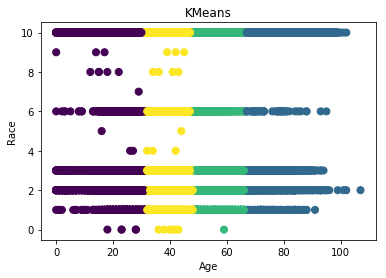

In [15]:
#KMeans doesn't work for Categorical variables -- ex. white, male
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(new_gunz)
predicted_clusters = kmeans.predict(new_gunz)

plt.scatter(new_gunz["age"],new_gunz["race"],c=predicted_clusters,s=50)

plt.xlabel("Age")
plt.ylabel("Race")
plt.title("KMeans")

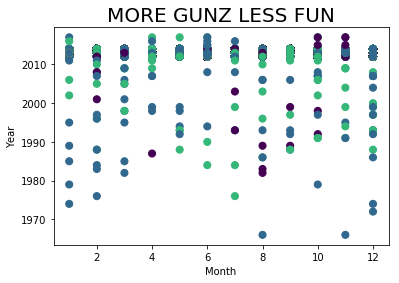

In [16]:
#KMeans doesn't work for Categorical variables -- ex. white, male
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(new_gunz)
predicted_clusters = kmeans.predict(new_gunz)

plt.scatter(new_gunz["month"],new_gunz["year"],c=predicted_clusters,s=50)

plt.xlabel("Month")
plt.ylabel("Year")
plt.title("MORE GUNZ LESS FUN", size=20)

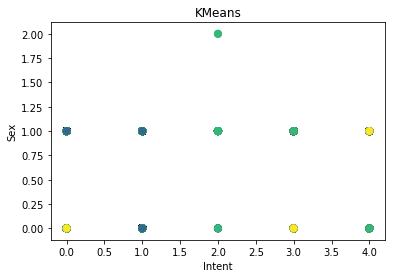

In [17]:
#KMeans doesn't work for Categorical variables -- ex. white, male
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(new_gunz)
predicted_clusters = kmeans.predict(new_gunz)

plt.scatter(new_gunz["intent"],new_gunz["sex"],c=predicted_clusters,s=50)

plt.xlabel("Intent")
plt.ylabel("Sex")
plt.title("KMeans")

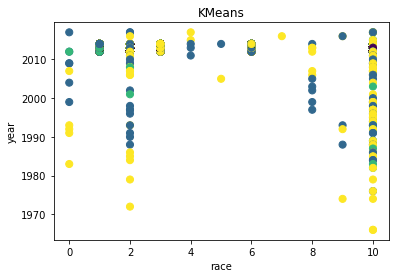

In [18]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(new_gunz)
predicted_clusters = kmeans.predict(new_gunz)

plt.scatter(new_gunz["race"],new_gunz["year"],c=predicted_clusters,s=50)

plt.xlabel("race")
plt.ylabel("year")
plt.title("KMeans")

In [19]:
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(new_gunz)
classifier = tf.contrib.learn.DNNClassifier(hidden_units=[10, 20, 10], n_classes=3, feature_columns=feature_columns, model_dir="my_model")
classifier.fit(X_train, y_train, steps=300, batch_size=32)
survived_predictions = list(classifier.predict(seXless_gunz, as_iterable=True))
score = metrics.accuracy_score(y, survived_predictions)
print(score)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a245b7128>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving 

/Users/EricaLei/anaconda/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into my_model/model.ckpt.
INFO:tensorflow:loss = 55.9412, step = 1
INFO:tensorflow:global_step/sec: 604.529
INFO:tensorflow:loss = 1.19287, step = 101 (0.167 sec)
INFO:tensorflow:global_step/sec: 638.582
INFO:tensorflow:loss = 0.799499, step = 201 (0.157 sec)
INFO:tensorflow:Saving checkpoints for 300 into my_model/model.ckpt.
INFO:tensorflow:Loss for final step: 0.372198.
Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Argu

In [20]:
# feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(new_gunz)
# classifier = tf.contrib.learn.DNNClassifier(hidden_units=[10, 20, 10], n_classes=3, feature_columns=feature_columns, model_dir="my_model")
# classifier.fit(X_train, y_train)
# classifier.score(X_test, y_test)
# survived_predictions = list(classifier.predict(seXless_gunz, as_iterable=True))
# score = metrics.accuracy_score(y, survived_predictions)


In [21]:
def custom_model(X, y):
    layers = skflow.ops.dnn(X, [20, 40, 20], tf.tanh)
    return skflow.models.logistic_regression(layers, y)

In [22]:
prediction = classifier.predict(X_test)
new_gunz[new_gunz.sex != prediction]

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


/Users/EricaLei/anaconda/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Restoring parameters from my_model/model.ckpt-300


,year,month,intent,sex,age,race
0,2012,1,3,1,34.0,1
1,2012,1,3,0,21.0,10
2,2012,1,3,1,60.0,10
3,2012,2,3,1,64.0,10
4,2012,2,3,1,31.0,10
5,2012,2,3,1,17.0,6
6,2012,2,4,1,48.0,10
7,2012,3,3,1,41.0,6
8,2012,2,0,1,50.0,10
10,2012,2,3,1,30.0,10


In [23]:
intent_set_1 = new_gunz.loc[new_gunz["intent"] == 0]
intent_set_2 = new_gunz.loc[new_gunz["intent"] == 1]
intent_set_3 = new_gunz.loc[new_gunz["intent"] == 2]
intent_set_4 = new_gunz.loc[new_gunz["intent"] == 3]
intent_set = pd.concat([intent_set_1, intent_set_2, intent_set_3, intent_set_4])
testing_set = preprocess_deezGuns_df(intent_set)
testing_set.head()

,year,month,intent,sex,age,race
8,2012,2,0,1,50.0,10
56,2012,7,0,1,12.0,2
71,2012,8,0,1,71.0,10
73,2012,9,0,1,26.0,10
93,2012,9,0,0,19.0,3


In [24]:
training_set = pd.concat([new_gunz, intent_set]).drop_duplicates(keep=False)
training_set = preprocess_deezGuns_df(training_set)
training_set.head()

,year,month,intent,sex,age,race
6,2012,2,0,1,48.0,4
35,2012,4,0,1,26.0,4
53,2012,6,0,0,26.0,3
75,2012,9,0,1,26.0,3
90,2012,9,0,0,22.0,4


In [25]:
X1_train = training_set.drop(['sex'], axis = 1).values
y1_train = training_set['sex'].values
X1_test = testing_set.drop(['sex'], axis = 1).values
y1_test = testing_set['sex'].values

In [26]:
classifier.fit(X1_train, y1_train)


Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.


/Users/EricaLei/anaconda/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from my_model/model.ckpt-300
INFO:tensorflow:Saving checkpoints for 301 into my_model/model.ckpt.
INFO:tensorflow:loss = 0.537094, step = 301
INFO:tensorflow:global_step/sec: 338.265
INFO:tensorflow:loss = 0.541476, step = 401 (0.297 sec)
INFO:tensorflow:global_step/sec: 244.745
INFO:tensorflow:loss = 0.60987, step = 501 (0.409 sec)
INFO:tensorflow:global_step/sec: 244.164
INFO:tensorflow:loss = 0.586687, step = 601 (0.409 sec)
INFO:tensorflow:global_step/sec: 300.63
INFO:tensorflow:loss = 0.570456, step = 701 (0.332 sec)
INFO:tensorflow:global_step/sec: 299.515
INFO:tensorflow:loss = 0.557694, step = 801 (0.334 sec)
INFO:tensorflow:global_step/sec: 241.802
INFO:tensorflow:loss = 0.548483, step = 901 (0.414 sec)
INFO:tensorflow:global_step/sec: 319.331
INFO:tensorflow:loss = 0.542215, step = 1001 (0.312 sec)
INFO:tensorflow:global_step/sec: 268.372
INFO:tensorflow:loss = 0.538115, step = 1101 (0.372 sec)
I

INFO:tensorflow:global_step/sec: 300.786
INFO:tensorflow:loss = 0.530771, step = 8601 (0.333 sec)
INFO:tensorflow:global_step/sec: 311.505
INFO:tensorflow:loss = 0.530767, step = 8701 (0.321 sec)
INFO:tensorflow:global_step/sec: 337.3
INFO:tensorflow:loss = 0.530762, step = 8801 (0.296 sec)
INFO:tensorflow:global_step/sec: 353.573
INFO:tensorflow:loss = 0.530758, step = 8901 (0.283 sec)
INFO:tensorflow:global_step/sec: 354.12
INFO:tensorflow:loss = 0.530754, step = 9001 (0.282 sec)
INFO:tensorflow:global_step/sec: 302.086
INFO:tensorflow:loss = 0.53075, step = 9101 (0.331 sec)
INFO:tensorflow:global_step/sec: 329.598
INFO:tensorflow:loss = 0.530746, step = 9201 (0.303 sec)
INFO:tensorflow:global_step/sec: 342.174
INFO:tensorflow:loss = 0.530743, step = 9301 (0.292 sec)
INFO:tensorflow:global_step/sec: 266.24
INFO:tensorflow:loss = 0.530744, step = 9401 (0.376 sec)
INFO:tensorflow:global_step/sec: 311.246
INFO:tensorflow:loss = 0.53075, step = 9501 (0.322 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:loss = 0.530708, step = 16901 (0.317 sec)
INFO:tensorflow:global_step/sec: 331.229
INFO:tensorflow:loss = 0.530709, step = 17001 (0.302 sec)
INFO:tensorflow:global_step/sec: 330.275
INFO:tensorflow:loss = 0.530707, step = 17101 (0.303 sec)
INFO:tensorflow:global_step/sec: 328.171
INFO:tensorflow:loss = 0.530713, step = 17201 (0.304 sec)
INFO:tensorflow:global_step/sec: 354.13
INFO:tensorflow:loss = 0.530712, step = 17301 (0.282 sec)
INFO:tensorflow:global_step/sec: 348.633
INFO:tensorflow:loss = 0.530709, step = 17401 (0.287 sec)
INFO:tensorflow:global_step/sec: 354.833
INFO:tensorflow:loss = 0.530706, step = 17501 (0.282 sec)
INFO:tensorflow:global_step/sec: 337.17
INFO:tensorflow:loss = 0.530708, step = 17601 (0.297 sec)
INFO:tensorflow:global_step/sec: 317.251
INFO:tensorflow:loss = 0.530706, step = 17701 (0.316 sec)
INFO:tensorflow:global_step/sec: 324.133
INFO:tensorflow:loss = 0.53071, step = 17801 (0.307 sec)
INFO:tensorflow:global_step/sec: 336.695
INFO:tensorfl

INFO:tensorflow:global_step/sec: 300.106
INFO:tensorflow:loss = 0.530593, step = 25301 (0.333 sec)
INFO:tensorflow:global_step/sec: 258.64
INFO:tensorflow:loss = 0.530594, step = 25401 (0.388 sec)
INFO:tensorflow:global_step/sec: 139.659
INFO:tensorflow:loss = 0.530601, step = 25501 (0.715 sec)
INFO:tensorflow:global_step/sec: 274.623
INFO:tensorflow:loss = 0.5306, step = 25601 (0.363 sec)
INFO:tensorflow:global_step/sec: 262.7
INFO:tensorflow:loss = 0.530587, step = 25701 (0.381 sec)
INFO:tensorflow:global_step/sec: 248.804
INFO:tensorflow:loss = 0.530579, step = 25801 (0.402 sec)
INFO:tensorflow:global_step/sec: 286.366
INFO:tensorflow:loss = 0.53058, step = 25901 (0.349 sec)
INFO:tensorflow:global_step/sec: 259.046
INFO:tensorflow:loss = 0.53058, step = 26001 (0.386 sec)
INFO:tensorflow:global_step/sec: 255.813
INFO:tensorflow:loss = 0.53058, step = 26101 (0.391 sec)
INFO:tensorflow:global_step/sec: 304.864
INFO:tensorflow:loss = 0.530576, step = 26201 (0.328 sec)
INFO:tensorflow:gl

INFO:tensorflow:global_step/sec: 342.371
INFO:tensorflow:loss = 0.53042, step = 33601 (0.289 sec)
INFO:tensorflow:global_step/sec: 347.473
INFO:tensorflow:loss = 0.530419, step = 33701 (0.288 sec)
INFO:tensorflow:global_step/sec: 351.457
INFO:tensorflow:loss = 0.530414, step = 33801 (0.285 sec)
INFO:tensorflow:global_step/sec: 348.815
INFO:tensorflow:loss = 0.530412, step = 33901 (0.287 sec)
INFO:tensorflow:global_step/sec: 354.997
INFO:tensorflow:loss = 0.530409, step = 34001 (0.282 sec)
INFO:tensorflow:global_step/sec: 344.407
INFO:tensorflow:loss = 0.530408, step = 34101 (0.291 sec)
INFO:tensorflow:global_step/sec: 333.44
INFO:tensorflow:loss = 0.530407, step = 34201 (0.301 sec)
INFO:tensorflow:global_step/sec: 352.709
INFO:tensorflow:loss = 0.530406, step = 34301 (0.282 sec)
INFO:tensorflow:global_step/sec: 348.662
INFO:tensorflow:loss = 0.530401, step = 34401 (0.287 sec)
INFO:tensorflow:global_step/sec: 318.276
INFO:tensorflow:loss = 0.530398, step = 34501 (0.314 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 297.943
INFO:tensorflow:loss = 0.530255, step = 41901 (0.336 sec)
INFO:tensorflow:global_step/sec: 341.547
INFO:tensorflow:loss = 0.530248, step = 42001 (0.293 sec)
INFO:tensorflow:global_step/sec: 252.976
INFO:tensorflow:loss = 0.530245, step = 42101 (0.395 sec)
INFO:tensorflow:global_step/sec: 344.031
INFO:tensorflow:loss = 0.530244, step = 42201 (0.291 sec)
INFO:tensorflow:global_step/sec: 321.217
INFO:tensorflow:loss = 0.530244, step = 42301 (0.311 sec)
INFO:tensorflow:global_step/sec: 334.835
INFO:tensorflow:loss = 0.530243, step = 42401 (0.299 sec)
INFO:tensorflow:global_step/sec: 307.175
INFO:tensorflow:loss = 0.530242, step = 42501 (0.329 sec)
INFO:tensorflow:global_step/sec: 291.657
INFO:tensorflow:loss = 0.530239, step = 42601 (0.340 sec)
INFO:tensorflow:global_step/sec: 288.728
INFO:tensorflow:loss = 0.530222, step = 42701 (0.346 sec)
INFO:tensorflow:global_step/sec: 308.086
INFO:tensorflow:loss = 0.530221, step = 42801 (0.325 sec)
INFO:tenso

KeyboardInterrupt: 

In [ ]:
classifier.score(X1_test, y1_test)

In [ ]:
prediction = classifier.predict(X1_test)
new_gunz[new_gunz.sex != prediction]